<a href="https://colab.research.google.com/github/antonsysoev/appl_stat/blob/gh-pages/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Подключение среды R

In [1]:
%load_ext rpy2.ipython

2. Установка и подключение необходимых библиотек

In [2]:
%%R
library(readxl)
library(data.table)
install.packages("ggcorrplot")
library(ggcorrplot)
library(dplyr)
library(MASS)

R[write to console]: data.table 1.14.2 using 1 threads (see ?getDTthreads).  Latest news: r-datatable.com

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘plyr’, ‘reshape2’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/plyr_1.8.6.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 401191 bytes (391 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to 

3. Считывание данных

In [3]:
%%R
data <-fread("/content/dib_dataset.csv")

In [4]:
%%R
str(data)

Classes ‘data.table’ and 'data.frame':	9504 obs. of  192 variables:
 $ locality_code                                                                                                        : chr  "AE" "AF" "AG" "AO" ...
 $ locality_name                                                                                                        : chr  "United Arab Emirates" "Afghanistan" "Antigua and Barbuda" "Angola" ...
 $ date                                                                                                                 : IDate, format: "2020-02-15" "2020-02-15" ...
 $ new_cases                                                                                                            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ new_deaths                                                                                                           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ acc_cases                                                                                                     

4. Отбор числовых признаков, очистка данных

In [59]:
%%R
data_analysis <- data.frame(Y=data$gdp_per_capita_us_dollars_2017, 
                            X1 = data$agricultural_production_index_base_2004_2006_100_2016,
                            X2 = data$food_production_index_base_2004_2006_100_2016,
                            X3 = data$urban_population_percent_2018,
                            X4 = data$sex_ratio_males_per_100_females_2019,
                            X5 = data$population_density_2019,
                            X6 = data$employment_by_industry_industry_male_and_female_2019,
                            X7 = data$life_expectancy_at_birth_for_both_sexes_years_2015,
                            X8 = data$forest_cover_thousand_hectares_2016,
                            X9 = data$emissions_per_capita_metric_tons_of_carbon_dioxide_2014)


In [60]:
%%R
summary(data_analysis)

       Y                X1              X2              X3        
 Min.   :   378   Min.   : 59.2   Min.   : 59.2   Min.   : 13.20  
 1st Qu.:  2342   1st Qu.:101.5   1st Qu.:101.5   1st Qu.: 43.50  
 Median :  7977   Median :117.3   Median :118.0   Median : 65.35  
 Mean   : 18141   Mean   :121.6   Mean   :122.3   Mean   : 62.59  
 3rd Qu.: 25655   3rd Qu.:139.2   3rd Qu.:139.7   3rd Qu.: 82.20  
 Max.   :166022   Max.   :198.4   Max.   :198.4   Max.   :100.00  
 NA's   :360      NA's   :504     NA's   :504     NA's   :432     
       X4               X5                 X6              X7       
 Min.   : 83.84   Min.   :   2.076   Min.   : 4.79   Min.   :51.95  
 1st Qu.: 94.92   1st Qu.:  37.858   1st Qu.:16.03   1st Qu.:68.47  
 Median : 97.91   Median :  93.398   Median :19.77   Median :74.36  
 Mean   :102.25   Mean   : 294.560   Mean   :20.38   Mean   :72.65  
 3rd Qu.:100.54   3rd Qu.: 222.247   3rd Qu.:25.22   3rd Qu.:78.94  
 Max.   :305.42   Max.   :8291.910   Max.   :54.69

[1] 8712


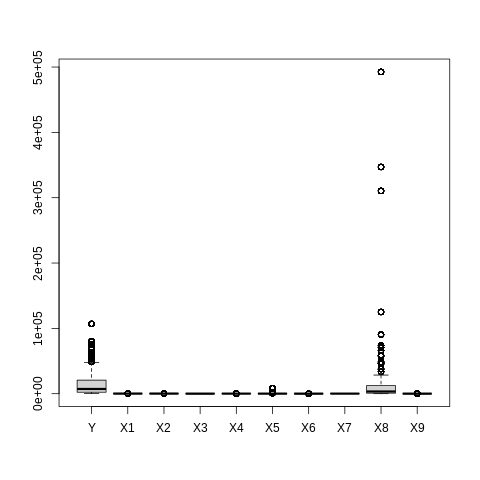

In [61]:
%%R
data_analysis <- na.omit(data_analysis)
boxplot(data_analysis)
length(data_analysis$Y)

5. Визуализация корреляционных связей

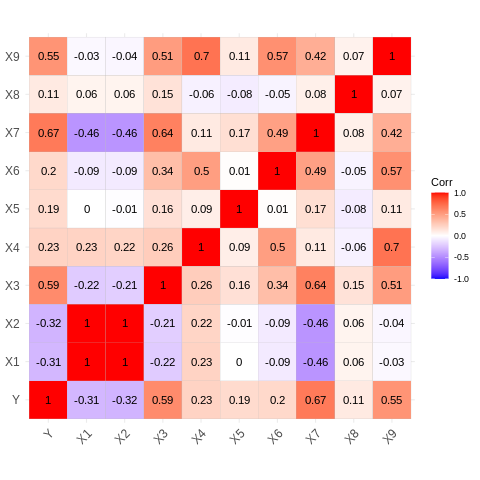

In [62]:
%%R
ggcorrplot(cor(data_analysis), lab = TRUE)

6. Построение множественной линейной регрессии

In [63]:
%%R

m_linear_regression <- lm(Y~., data_analysis)
summary(m_linear_regression)


Call:
lm(formula = Y ~ ., data = data_analysis)

Residuals:
   Min     1Q Median     3Q    Max 
-30140  -8097  -1803   5570  49595 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -8.330e+04  2.285e+03 -36.452  < 2e-16 ***
X1           2.938e+01  5.368e+01   0.547   0.5841    
X2          -7.509e+01  5.136e+01  -1.462   0.1438    
X3           9.851e+01  8.349e+00  11.799  < 2e-16 ***
X4           3.899e+01  8.295e+00   4.700 2.64e-06 ***
X5           7.343e-01  1.751e-01   4.193 2.78e-05 ***
X6          -1.013e+03  2.339e+01 -43.323  < 2e-16 ***
X7           1.504e+03  2.810e+01  53.542  < 2e-16 ***
X8           3.673e-03  2.215e-03   1.658   0.0973 .  
X9           1.253e+03  3.179e+01  39.423  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12350 on 8702 degrees of freedom
Multiple R-squared:  0.6386,	Adjusted R-squared:  0.6382 
F-statistic:  1708 on 9 and 8702 DF,  p-value: < 2.2e-16



7. Построение пошаговой регрессии

    7.1. На включение

In [64]:
%%R
model_step_forward <- stepAIC(m_linear_regression, direction = "forward")

Start:  AIC=164163.5
Y ~ X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9



In [68]:
%%R

summary(model_step_forward)


Call:
lm(formula = Y ~ X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9, 
    data = data_analysis)

Residuals:
   Min     1Q Median     3Q    Max 
-30140  -8097  -1803   5570  49595 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -8.330e+04  2.285e+03 -36.452  < 2e-16 ***
X1           2.938e+01  5.368e+01   0.547   0.5841    
X2          -7.509e+01  5.136e+01  -1.462   0.1438    
X3           9.851e+01  8.349e+00  11.799  < 2e-16 ***
X4           3.899e+01  8.295e+00   4.700 2.64e-06 ***
X5           7.343e-01  1.751e-01   4.193 2.78e-05 ***
X6          -1.013e+03  2.339e+01 -43.323  < 2e-16 ***
X7           1.504e+03  2.810e+01  53.542  < 2e-16 ***
X8           3.673e-03  2.215e-03   1.658   0.0973 .  
X9           1.253e+03  3.179e+01  39.423  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12350 on 8702 degrees of freedom
Multiple R-squared:  0.6386,	Adjusted R-squared:  0.6382 
F-statistic:  170

    7.2. На исключение

In [65]:
%%R
model_step_backward <- stepAIC(m_linear_regression, direction = "backward")

Start:  AIC=164163.5
Y ~ X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9

       Df  Sum of Sq        RSS    AIC
- X1    1 4.5678e+07 1.3265e+12 164162
<none>               1.3265e+12 164164
- X2    1 3.2581e+08 1.3268e+12 164164
- X8    1 4.1927e+08 1.3269e+12 164164
- X5    1 2.6795e+09 1.3292e+12 164179
- X4    1 3.3678e+09 1.3298e+12 164184
- X3    1 2.1220e+10 1.3477e+12 164300
- X9    1 2.3690e+11 1.5634e+12 165593
- X6    1 2.8610e+11 1.6126e+12 165863
- X7    1 4.3698e+11 1.7635e+12 166642

Step:  AIC=164161.9
Y ~ X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9

       Df  Sum of Sq        RSS    AIC
<none>               1.3265e+12 164162
- X8    1 4.2760e+08 1.3269e+12 164163
- X5    1 2.7258e+09 1.3292e+12 164178
- X4    1 3.4456e+09 1.3300e+12 164182
- X2    1 9.8251e+09 1.3363e+12 164224
- X3    1 2.1238e+10 1.3478e+12 164298
- X9    1 2.3852e+11 1.5650e+12 165600
- X6    1 2.8762e+11 1.6141e+12 165870
- X7    1 4.4240e+11 1.7689e+12 166667


In [69]:
%%R

summary(model_step_backward)


Call:
lm(formula = Y ~ X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9, data = data_analysis)

Residuals:
   Min     1Q Median     3Q    Max 
-30192  -8116  -1773   5574  49578 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -8.304e+04  2.234e+03 -37.170  < 2e-16 ***
X2          -4.716e+01  5.874e+00  -8.029 1.11e-15 ***
X3           9.854e+01  8.348e+00  11.804  < 2e-16 ***
X4           3.933e+01  8.272e+00   4.755 2.02e-06 ***
X5           7.395e-01  1.749e-01   4.229 2.37e-05 ***
X6          -1.014e+03  2.334e+01 -43.439  < 2e-16 ***
X7           1.502e+03  2.789e+01  53.875  < 2e-16 ***
X8           3.708e-03  2.214e-03   1.675    0.094 .  
X9           1.254e+03  3.171e+01  39.559  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12350 on 8703 degrees of freedom
Multiple R-squared:  0.6386,	Adjusted R-squared:  0.6383 
F-statistic:  1922 on 8 and 8703 DF,  p-value: < 2.2e-16



      7.3. Комбинированный подход

In [66]:
%%R
model_step_both <- stepAIC(m_linear_regression, direction = "both")


Start:  AIC=164163.5
Y ~ X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9

       Df  Sum of Sq        RSS    AIC
- X1    1 4.5678e+07 1.3265e+12 164162
<none>               1.3265e+12 164164
- X2    1 3.2581e+08 1.3268e+12 164164
- X8    1 4.1927e+08 1.3269e+12 164164
- X5    1 2.6795e+09 1.3292e+12 164179
- X4    1 3.3678e+09 1.3298e+12 164184
- X3    1 2.1220e+10 1.3477e+12 164300
- X9    1 2.3690e+11 1.5634e+12 165593
- X6    1 2.8610e+11 1.6126e+12 165863
- X7    1 4.3698e+11 1.7635e+12 166642

Step:  AIC=164161.9
Y ~ X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9

       Df  Sum of Sq        RSS    AIC
<none>               1.3265e+12 164162
- X8    1 4.2760e+08 1.3269e+12 164163
+ X1    1 4.5678e+07 1.3265e+12 164164
- X5    1 2.7258e+09 1.3292e+12 164178
- X4    1 3.4456e+09 1.3300e+12 164182
- X2    1 9.8251e+09 1.3363e+12 164224
- X3    1 2.1238e+10 1.3478e+12 164298
- X9    1 2.3852e+11 1.5650e+12 165600
- X6    1 2.8762e+11 1.6141e+12 165870
- X7    1 4.4240e+11 1.7689e+12 166667


In [70]:
%%R

summary(model_step_both)


Call:
lm(formula = Y ~ X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9, data = data_analysis)

Residuals:
   Min     1Q Median     3Q    Max 
-30192  -8116  -1773   5574  49578 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -8.304e+04  2.234e+03 -37.170  < 2e-16 ***
X2          -4.716e+01  5.874e+00  -8.029 1.11e-15 ***
X3           9.854e+01  8.348e+00  11.804  < 2e-16 ***
X4           3.933e+01  8.272e+00   4.755 2.02e-06 ***
X5           7.395e-01  1.749e-01   4.229 2.37e-05 ***
X6          -1.014e+03  2.334e+01 -43.439  < 2e-16 ***
X7           1.502e+03  2.789e+01  53.875  < 2e-16 ***
X8           3.708e-03  2.214e-03   1.675    0.094 .  
X9           1.254e+03  3.171e+01  39.559  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12350 on 8703 degrees of freedom
Multiple R-squared:  0.6386,	Adjusted R-squared:  0.6383 
F-statistic:  1922 on 8 and 8703 DF,  p-value: < 2.2e-16



8. Сравнение

In [67]:
%%R

AIC(m_linear_regression, model_step_forward, model_step_backward, model_step_both)

                    df      AIC
m_linear_regression 11 188889.1
model_step_forward  11 188889.1
model_step_backward 10 188887.4
model_step_both     10 188887.4
